<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: machine learning practice with scikit-learn

---

We are going to use datasets about wine.

There are two datasets; one for white wines, one for red wines.

For information about the dataset look here:

- [https://archive.ics.uci.edu/ml/datasets/wine+quality](https://archive.ics.uci.edu/ml/datasets/wine+quality)
- [Data description](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names)

## Part 2: Classification

For this exercise we'll try and predict whether a wine is red or white based on its details.

#### 1: Read in *both* the white and red wine datasets into two DataFrames

In [1]:
#not massively efficient use of memory to move all of this into the name space, but i prefer to declare 
#dependencies explicitly and do so up here at the top assuming someone else will need to read or use my code one day

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
#haven't pulled sklearn up here as it's such a large library

%matplotlib inline

In [2]:
#sourcing both datasets, features are separated by semi-colons (again, learned through lots of error!)

df_red = pd.read_csv("data/winequality-red.csv", sep=";")
df_white = pd.read_csv("data/winequality-white.csv", sep=";")

In [3]:
df_red.shape #i've also checked df_white but as it's a replica to part 1, i've deleted the cells from the notebook

(1599, 12)

In [4]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df_white.head() #checking index and headers match up before adding columns and concatenating

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### 2: In both DataFrames create a 'colour' column (with values 'white' and 'red' respectively)

In [9]:
df_white.loc[:, 'colour'] = 'white'
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [10]:
df_red.loc[:, 'colour'] = 'red'
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


#### 3: Create a single dataset by concatenating (hint, hint) them together

In [11]:
winedf = pd.concat([df_red,df_white],axis=0) #i have the same column headings, but want to 
#create a dataframe with all rows maintained
winedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [12]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
colour                  6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [13]:
winedf.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,NaN
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,NaN
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,NaN
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,NaN


In [14]:
winedf.isnull().sum() #great news, no nulls!

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
colour                  0
dtype: int64

#### 4: Do some exploration of your two classes

You may be interested in questions like:

- what proportion of wines are red vs. white?
- what is the breakdown of our variables by class? (i.e. what does alcohol content, citric acid etc. look like for white vs. red wines?)

In [15]:
winedf['colour'].value_counts()

white    4898
red      1599
Name: colour, dtype: int64

In [16]:
#I'll need it later given this is for classification - the majority class divided by the total. 75% of the sample data 
#are for white wine
4898/(4898+1599)

0.7538864091118977

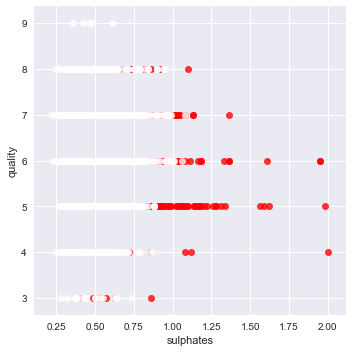

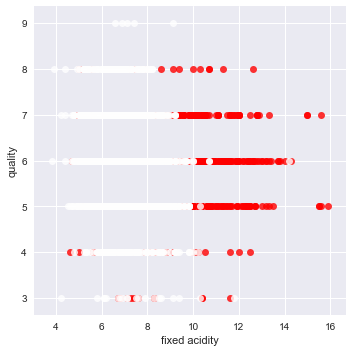

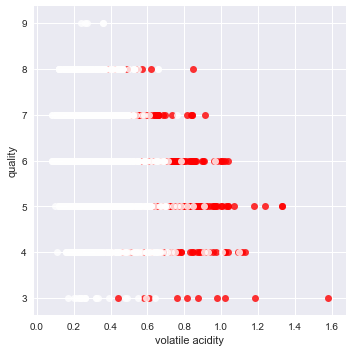

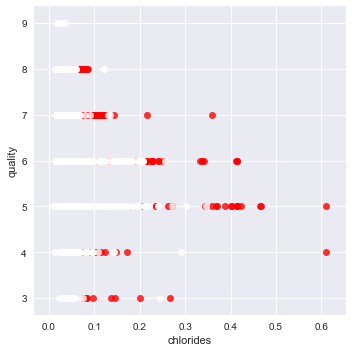

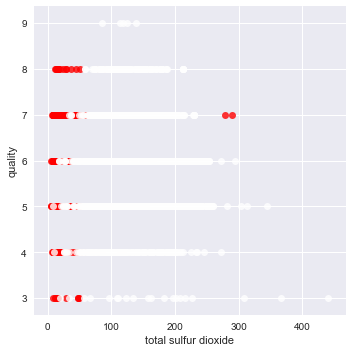

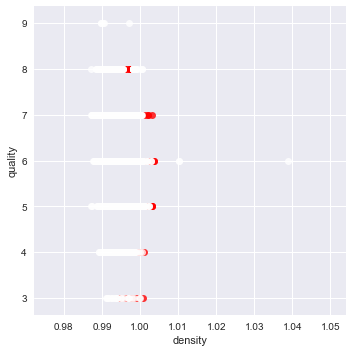

In [17]:
#determining correlation between different features for X and y=quality, with a comparison of red vs white. I've run 
#many of these, but have only kept those for whom a strong white vs red difference is evident

sns.lmplot( x="sulphates", y="quality", data=winedf, fit_reg=False, hue='colour', legend=False, palette=dict(white="white", red="red"))
sns.lmplot( x="fixed acidity", y="quality", data=winedf, fit_reg=False, hue='colour', legend=False, palette=dict(white="white", red="red"))
sns.lmplot( x="volatile acidity", y="quality", data=winedf, fit_reg=False, hue='colour', legend=False, palette=dict(white="white", red="red"))
sns.lmplot( x="chlorides", y="quality", data=winedf, fit_reg=False, hue='colour', legend=False, palette=dict(white="white", red="red"))
sns.lmplot( x="total sulfur dioxide", y="quality", data=winedf, fit_reg=False, hue='colour', legend=False, palette=dict(white="white", red="red"))
sns.lmplot( x="density", y="quality", data=winedf, fit_reg=False, hue='colour', legend=False, palette=dict(white="white", red="red"))

#tested, but no clear difference as seems relevant to a classifier: citric acid, free sulfur dioxide, pH, alcohol

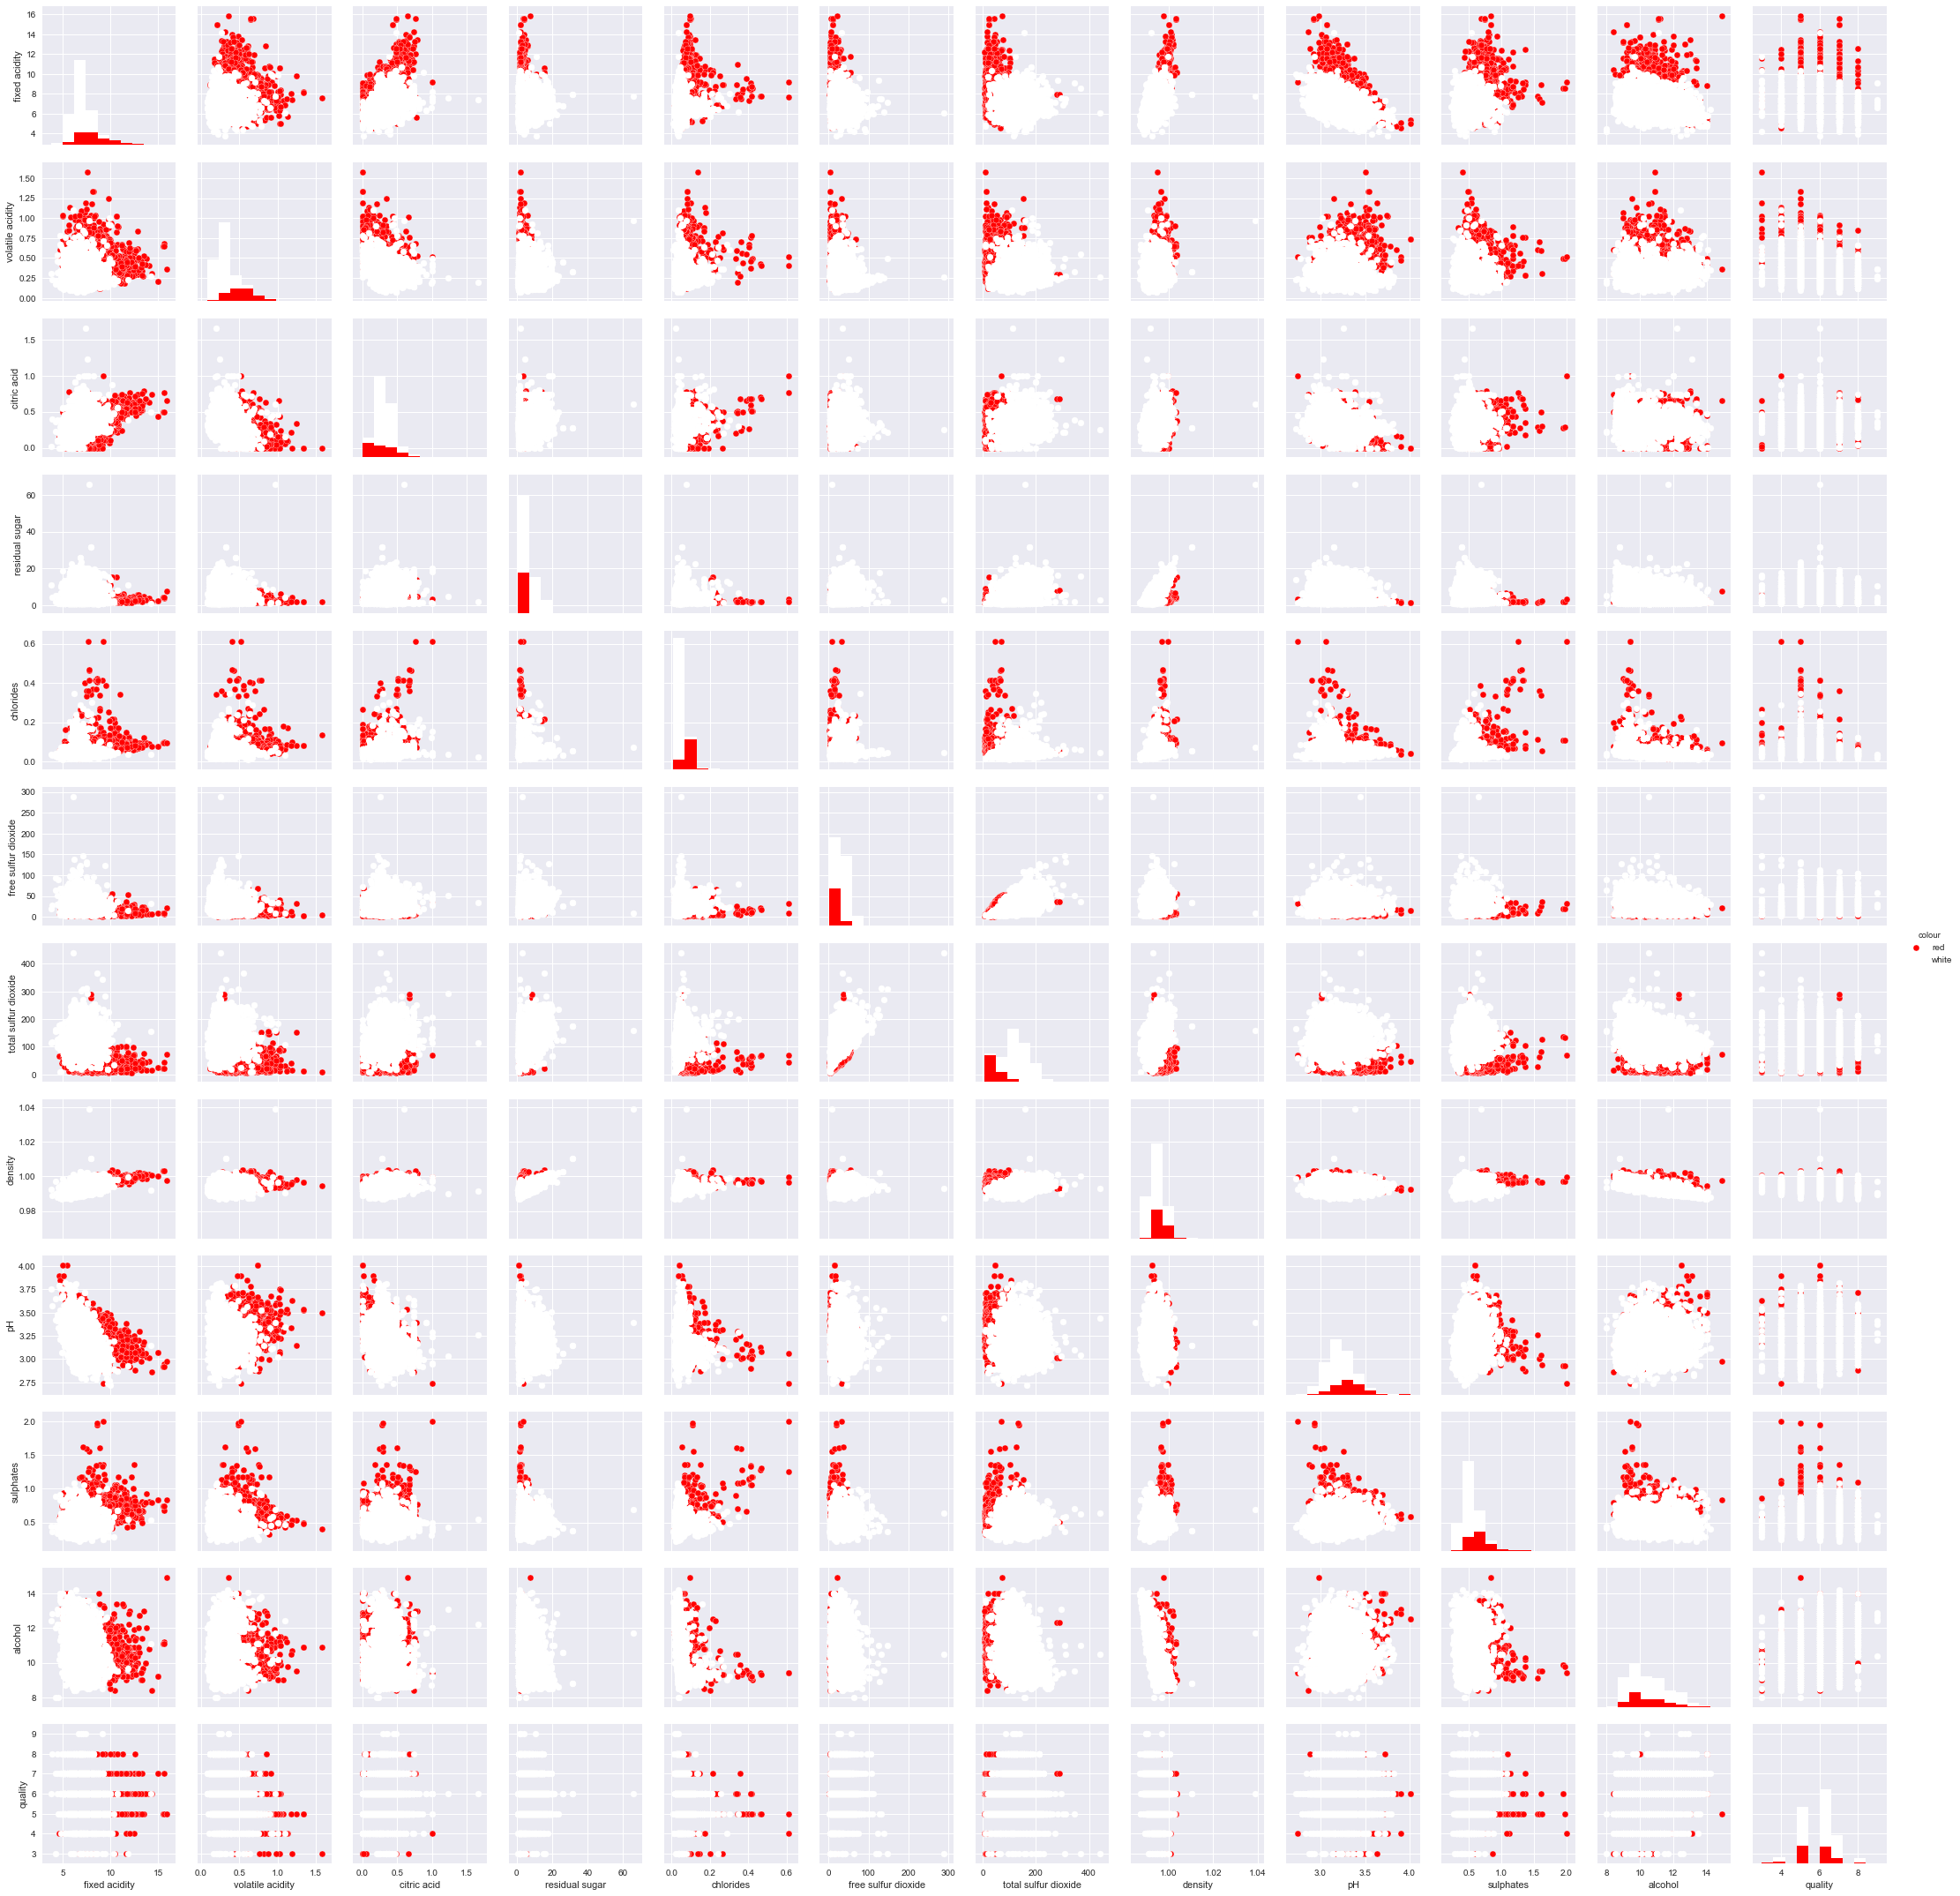

In [18]:
sns.pairplot(winedf, kind="scatter", hue="colour", palette=dict(white="white", red="red"))
plt.show() 

#without examining more closely, it's clear that there's some degree of separation between the red and white 
#classes for certain features (such as sulphates). This means we should be able to make a reliable classifier 
#using the data samples available. it's a bit too zoomed out to learn much about specific features

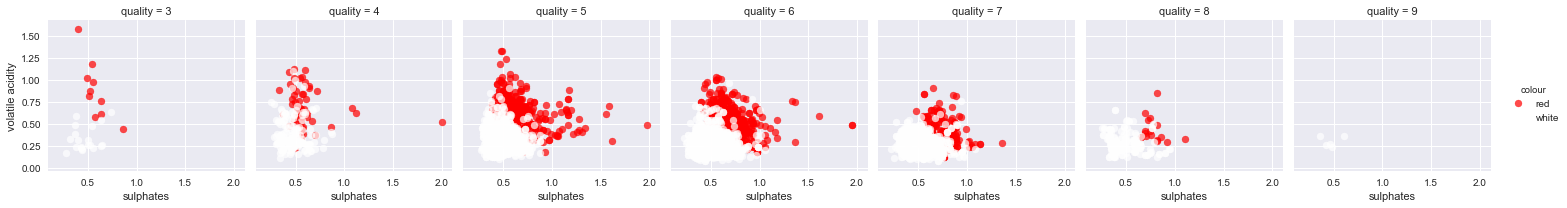

In [19]:
#a good balance between the pairplot and the lmplots seems to be facetgrid. I can take some features 
#I've learned above look like they might be good for a classifier and plot them. here we're seeing 
#good promise for a classifier i think

grd = sns.FacetGrid(winedf, col="quality", hue="colour", palette=dict(white="white", red="red"))
grd.map(plt.scatter, "sulphates", "volatile acidity",alpha=.7)
grd.add_legend();

0.21900825635099685 2.1368086276600625e-71


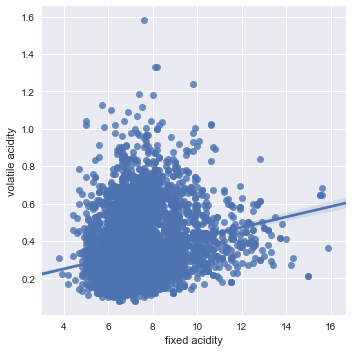

In [20]:
#final safety check, want to make sure I don't have co-linearity, notability with the two acidity features

sns.lmplot("fixed acidity", "volatile acidity", winedf);

corr, p_value = stats.pearsonr(winedf["fixed acidity"], winedf["volatile acidity"])
print(corr, p_value)

#i'm comfortable - there's a positive correlation (0.219) but it's weak enough that i'll retain the feature as 
#it looks promising

In [42]:
#now i'm going to encode the colour variable so I can use it better in modelling and metrics below. i've 
#dropped the first colour (red/white) variable and now focus simply on whether an observation is colour_white (0) or (1)

winedf2 = pd.get_dummies(winedf,prefix=['colour'], drop_first=True)
winedf2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


#### 5: Take 3-4 of the columns of interest and create a train-test split

Using the make-up of classes investigated above as an indication - should you or shouldn't you stratify your samples in the train-test split?

In [22]:
#should stratify the samples, i want to avoid class imbalance. 75% of the samples are for white wine

from sklearn.model_selection import train_test_split

predictors = ["sulphates","fixed acidity","volatile acidity","chlorides","total sulfur dioxide","density"]
target = ["colour_white"] 

from sklearn.model_selection import train_test_split

X = winedf2[predictors]
y = winedf2[target]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

4872 1625
4872 1625


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 6 columns):
sulphates               6497 non-null float64
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
chlorides               6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
dtypes: float64(6)
memory usage: 515.3 KB


In [24]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 1 columns):
colour_white    6497 non-null uint8
dtypes: uint8(1)
memory usage: 217.1 KB


#### 6: Choose to fit either a logistic regression or a KNN classifier. What is the cross-validated accuracy of your chosen classifier?

You might have noticed the classes are skewed - use an appropriate metric for evaluation

In [26]:
#For practise, I'd like to do both. Firstly, Logistic Regression:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9723076923076923

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc}\tPrecision: {prec}\tRecall: {rec}\tF-1: {f1}")

Accuracy: 0.9723076923076923	Precision: 0.9727564102564102	Recall: 0.9910204081632653	F-1: 0.9818034775576223


In [29]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

#as evident from precision, recall and F1 in the cell above, performance remains high. 
#TN = 366 observations, TP = 1214 observations. Slightly more tendency to create a false 
#positive (34 vs 11) but that would be expected given white wine is the majority class

[[ 366   34]
 [  11 1214]]


In [30]:
#Now KNN: firstly, re-working the target data

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

lb2 = LabelBinarizer()
X2 = winedf2[predictors]
y2 = lb2.fit_transform(y).ravel()

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,
                                                    y2,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)
print(len(X2_train), len(X2_test))
print(len(y2_train), len(y2_test))

4872 1625
4872 1625


#### 7: Use grid search to optimise your model and get the optimal hyperparameter value

- look at the best score of your grid search
- look at the best hyperparameter

In [31]:
#Given the very high performance of the Logistic Regression, I've decided to try and optimise K for KNN
from sklearn.model_selection import GridSearchCV

k = range(2, 20)
params = {'n_neighbors': k }
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=params,
    cv=10,
    return_train_score=True)
gs.fit(X2, y2)

gs.cv_results_

{'mean_fit_time': array([0.00597601, 0.00538511, 0.00533259, 0.00540059, 0.00535727,
        0.00551133, 0.00543854, 0.00545378, 0.00546601, 0.00544233,
        0.00534194, 0.005457  , 0.00554628, 0.00579581, 0.00543573,
        0.00549858, 0.00542428, 0.00529182]),
 'mean_score_time': array([0.00368009, 0.00304468, 0.00315616, 0.0032937 , 0.00341313,
        0.00364182, 0.00365794, 0.00380752, 0.0038413 , 0.00406466,
        0.00406346, 0.00426636, 0.00440047, 0.00499413, 0.00464916,
        0.0046669 , 0.00486727, 0.00489318]),
 'mean_test_score': array([0.93058335, 0.93243035, 0.9310451 , 0.93458519, 0.93581653,
        0.93612437, 0.93520086, 0.93304602, 0.9328921 , 0.93273819,
        0.93304602, 0.93473911, 0.93427736, 0.93443128, 0.93412344,
        0.93504694, 0.93489303, 0.93381561]),
 'mean_train_score': array([0.98024732, 0.97084129, 0.96276916, 0.9572453 , 0.9547655 ,
        0.95102018, 0.95088337, 0.94677889, 0.94568439, 0.94359792,
        0.94277705, 0.94104976, 0.94113

#### 8: Use the "best estimator" from your grid search to get predictions on your test set

In [32]:
gs.best_estimator_
#Optimum K is 7

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [33]:
gs.best_params_

{'n_neighbors': 7}

In [34]:
gs.best_score_

0.9361243650915807

In [37]:
knn7 = KNeighborsClassifier(n_neighbors=7, weights='uniform') #with our optimum K

#fit
knn7.fit(X2_train, y2_train)

#predict
y2_pred = knn7.predict(X2_test)

#### 9: Get your model's final test-set "accuracy" (or whichever metric you chose)

In [38]:
#KNN assessment of 'accuracy'
print (knn7.score(X2_test, y2_test))

#by hand: total number of 'correct guesses' divided by total observations in test sample: 
#1525 correct guesses (sum of True Positive, True Negative) / 1625 in X2 test sample = 0.938

0.9384615384615385


#### 10: Look at your model's confusion matrix to see where it made errors

In [39]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y2_test, y2_pred))

[[ 330   70]
 [  30 1195]]


In [40]:
#In both cases, the KNN is a very high performing model, but it is outperformed on this dataset by Logistic Regression